# Exercise 2
## Dataset: Life Expectancy

### Import libriaries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from random import random
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor as SklearnRandomForestRegressor
import time

### Load data

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')

In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
df.columns = (
    df.columns
    .str.strip()                
    .str.lower()                
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('__', '_'))
print(df.columns)


Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


In [5]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Basic data exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio               

In [7]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
numeric_columns = df.select_dtypes(include=['number'])

print("Categorical columns:", categorical_columns)
print("Numeric columns:", numeric_columns.columns)

Categorical columns:           country      status
0     Afghanistan  Developing
1     Afghanistan  Developing
2     Afghanistan  Developing
3     Afghanistan  Developing
4     Afghanistan  Developing
...           ...         ...
2933     Zimbabwe  Developing
2934     Zimbabwe  Developing
2935     Zimbabwe  Developing
2936     Zimbabwe  Developing
2937     Zimbabwe  Developing

[2938 rows x 2 columns]
Numeric columns: Index(['year', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')


In [8]:
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique value")

country: 193 unique value
status: 2 unique value


In [9]:
# Many countries with only one row, which means, that we can have issues with spliting dataset
country_counts = df['country'].value_counts()
print(country_counts)

country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64


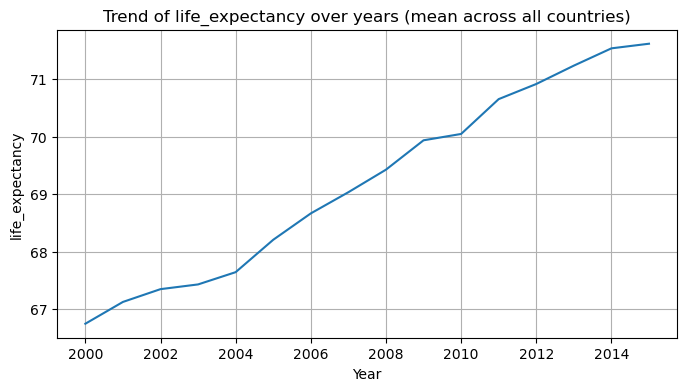

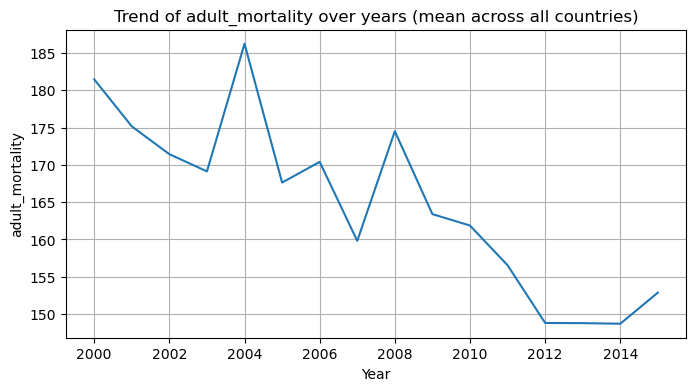

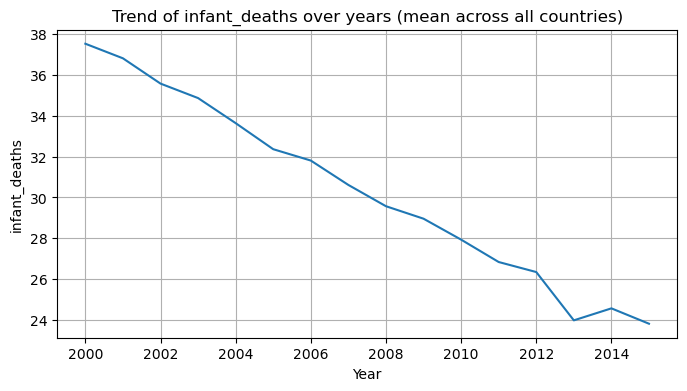

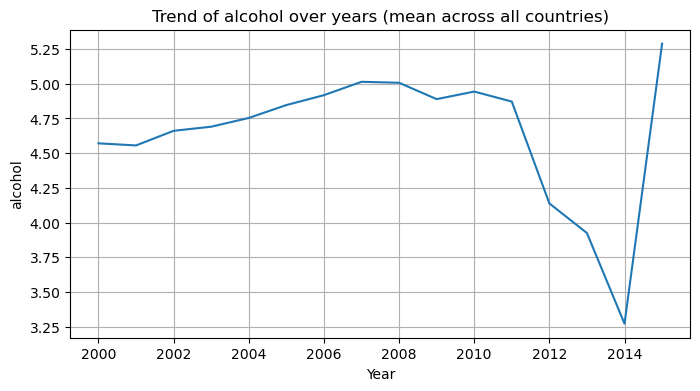

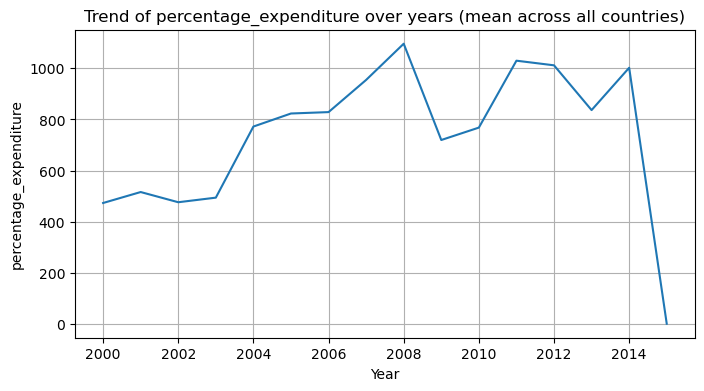

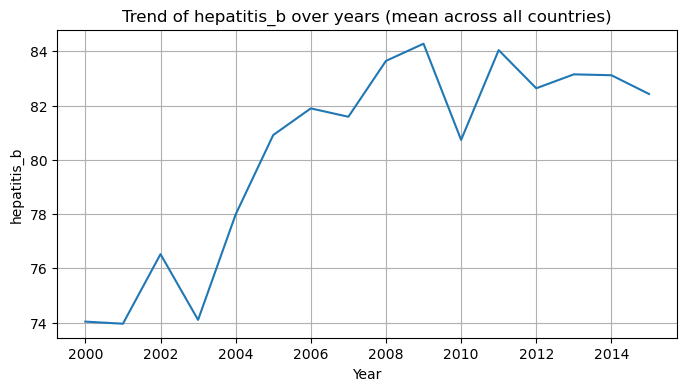

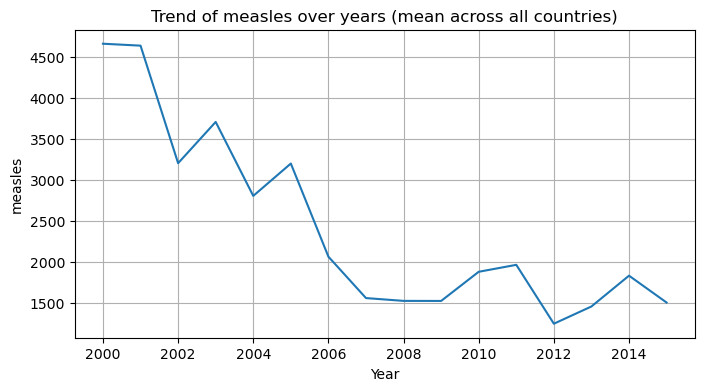

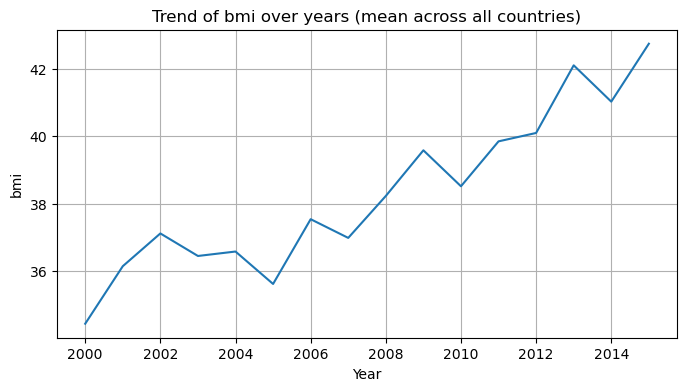

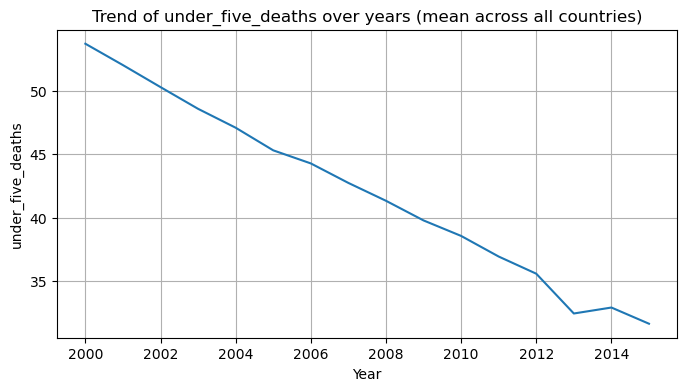

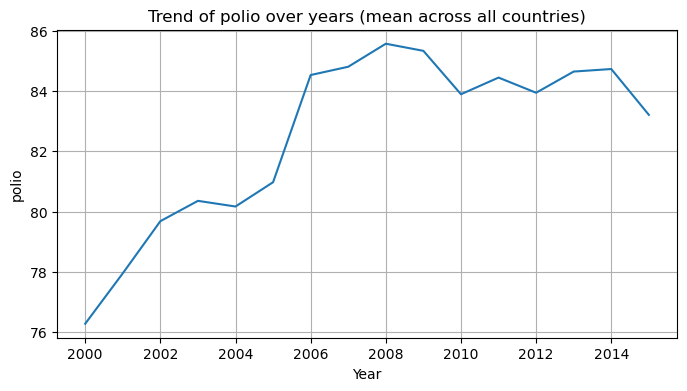

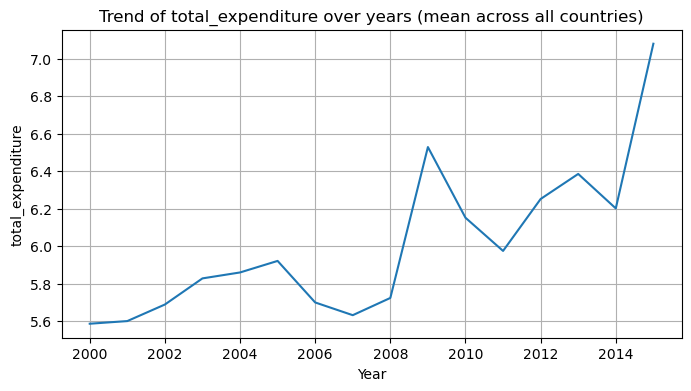

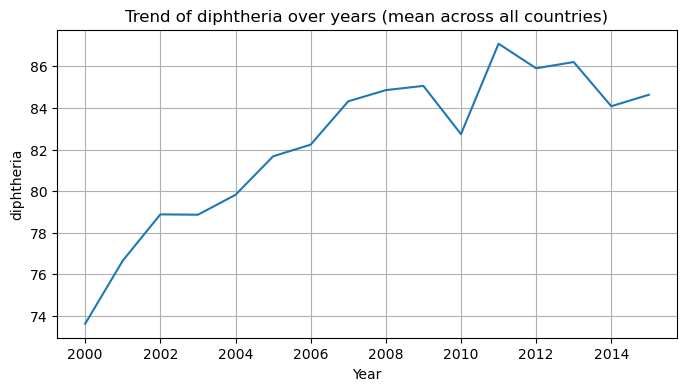

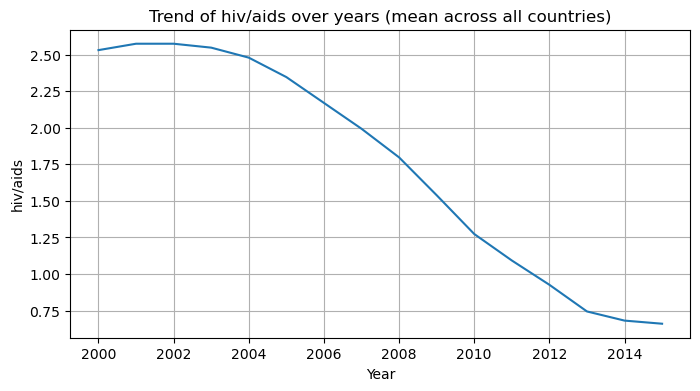

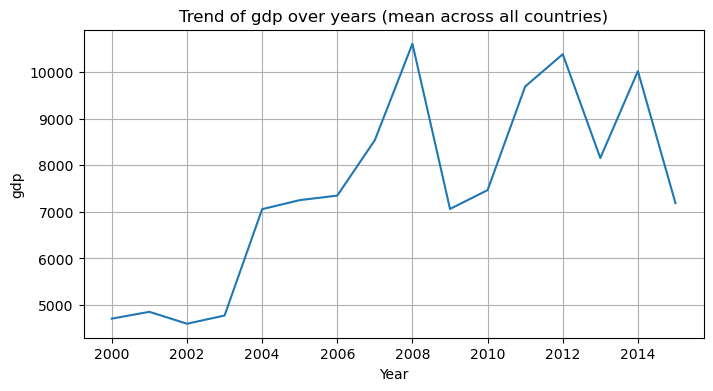

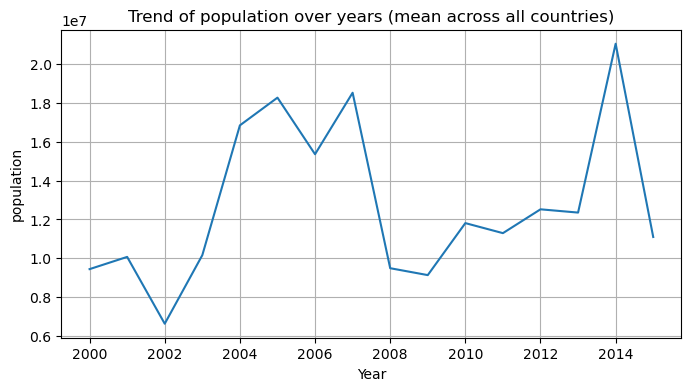

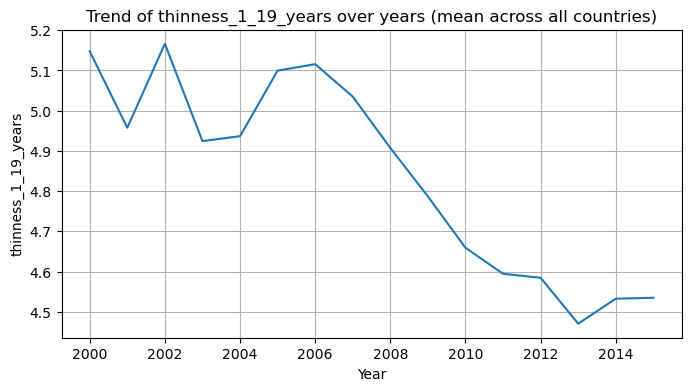

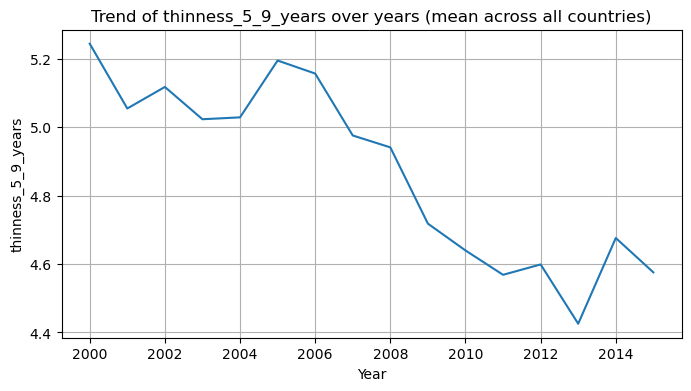

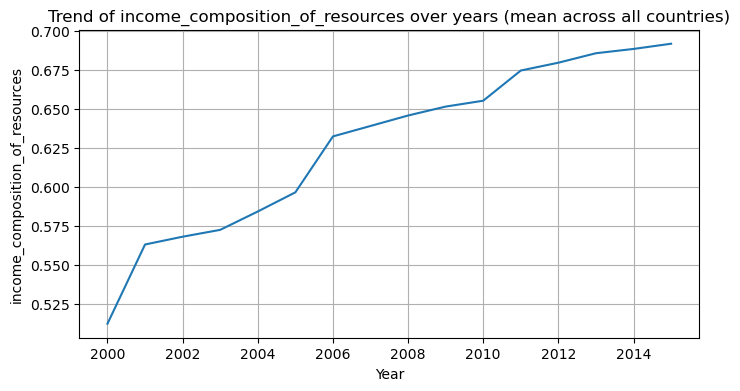

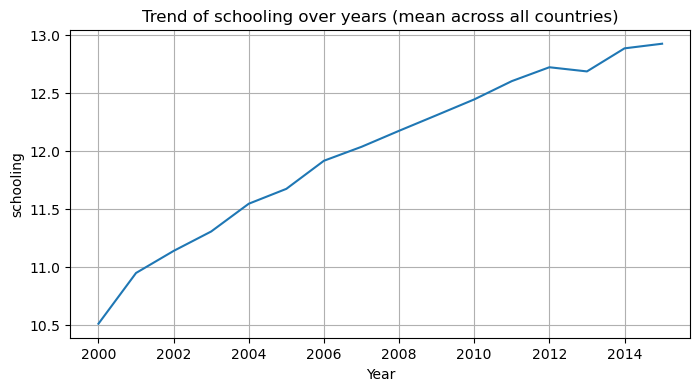

In [10]:
numeric_columns_excluding_year = [col for col in numeric_columns if col != 'year']

for col in numeric_columns_excluding_year:
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=df, x='year', y=col, estimator='mean', errorbar=None)
    plt.title(f'Trend of {col} over years (mean across all countries)')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


With years Life Expectancy, Schooling, Income composition of resources is increasing, while HIV/AIDS, under 5 deaths, Measeles and Adult Mortality is decreasing

### Checking for missing values

In [11]:
numeric_columns.isnull().sum()

year                                 0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [12]:
categorical_columns.isnull().sum()

country    0
status     0
dtype: int64

### Checking for outliers

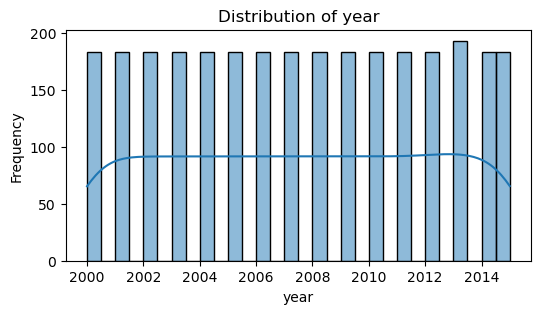

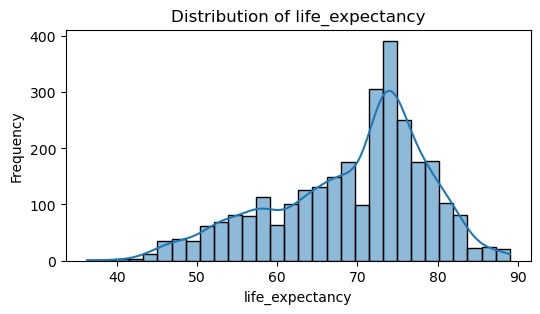

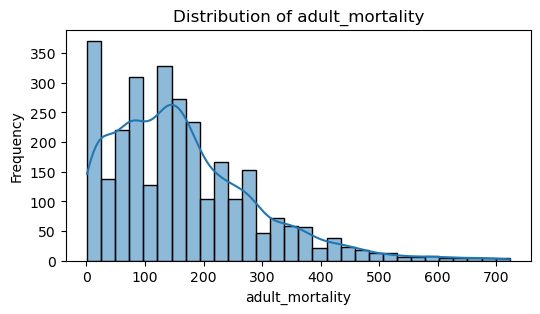

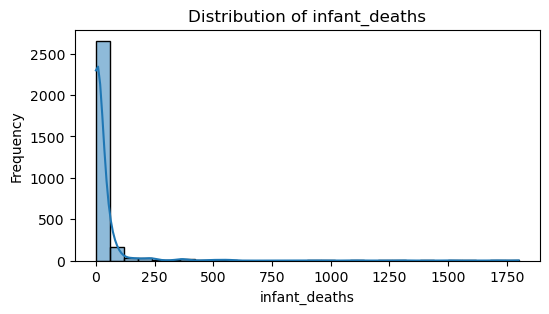

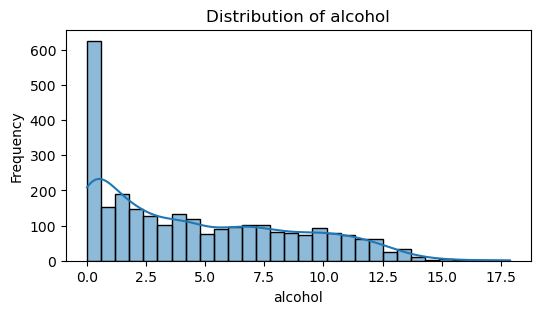

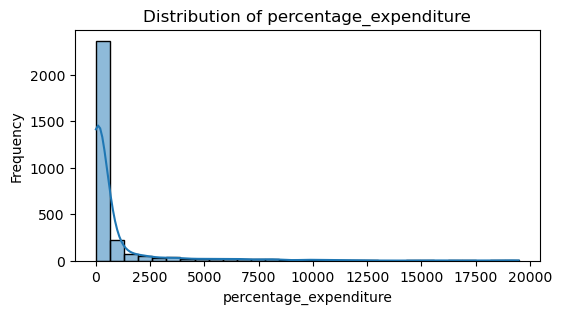

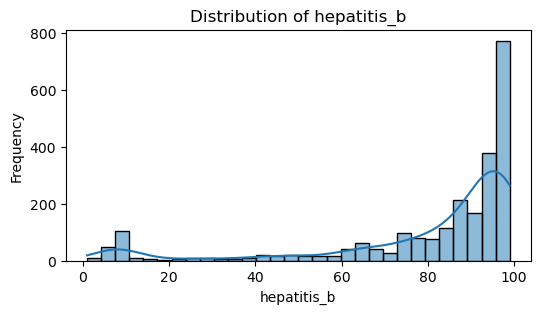

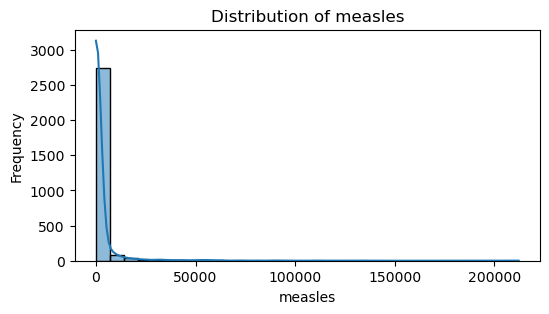

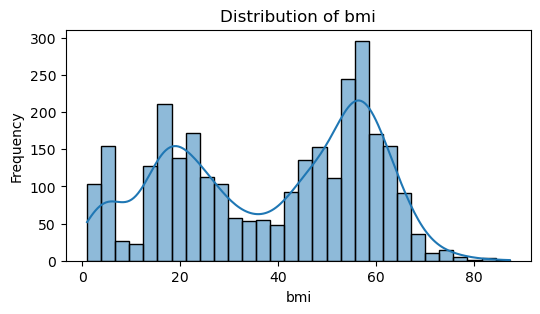

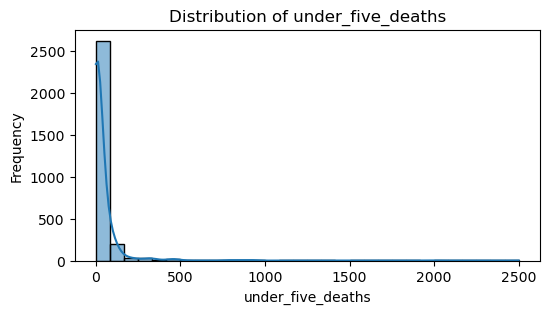

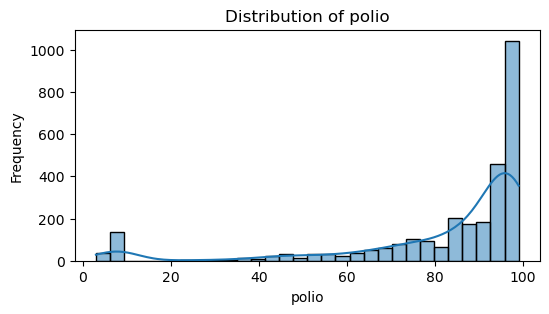

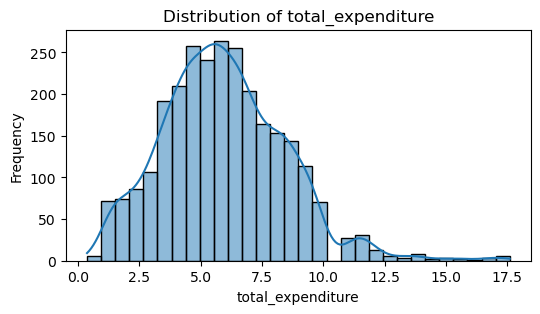

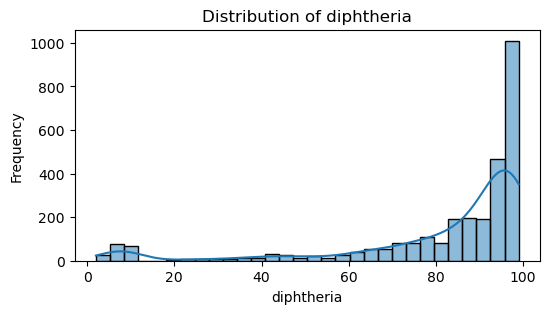

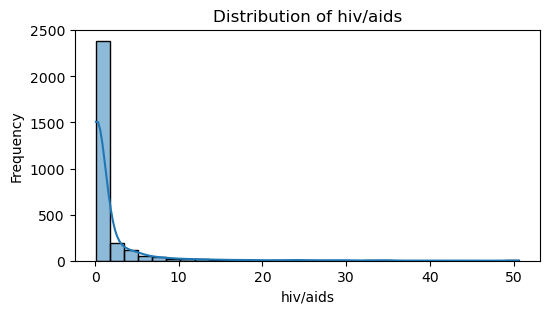

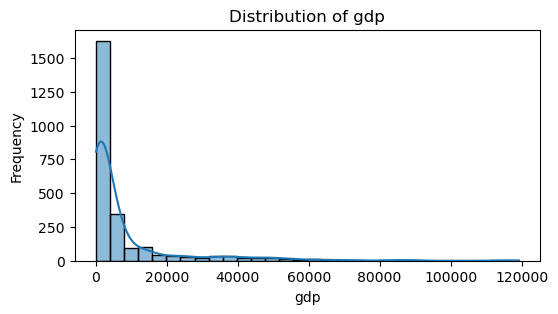

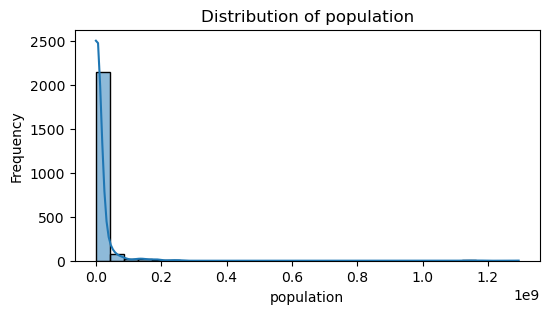

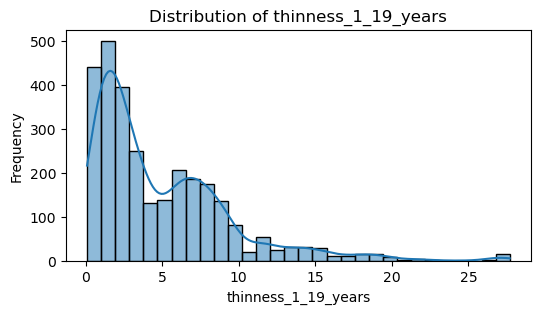

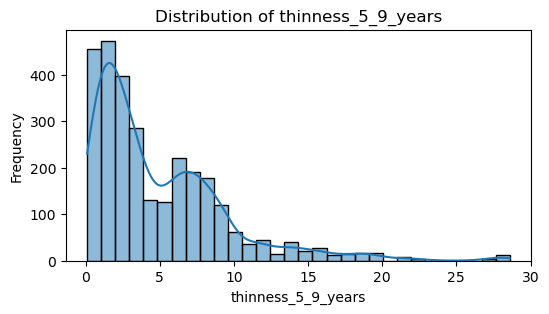

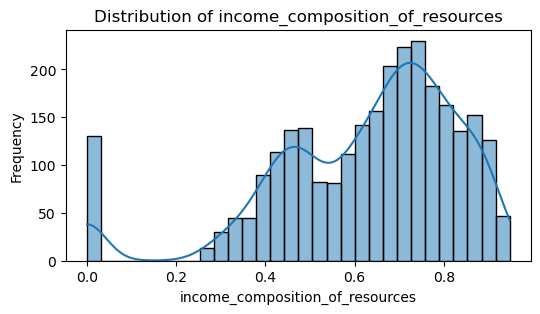

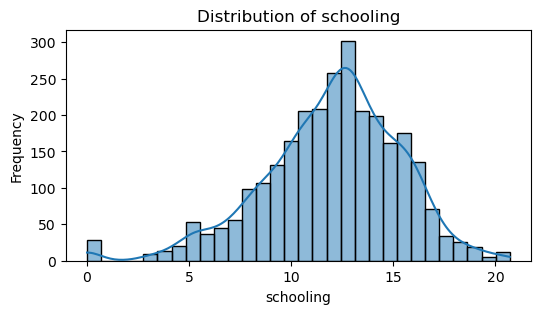

In [13]:
for col in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Correlation

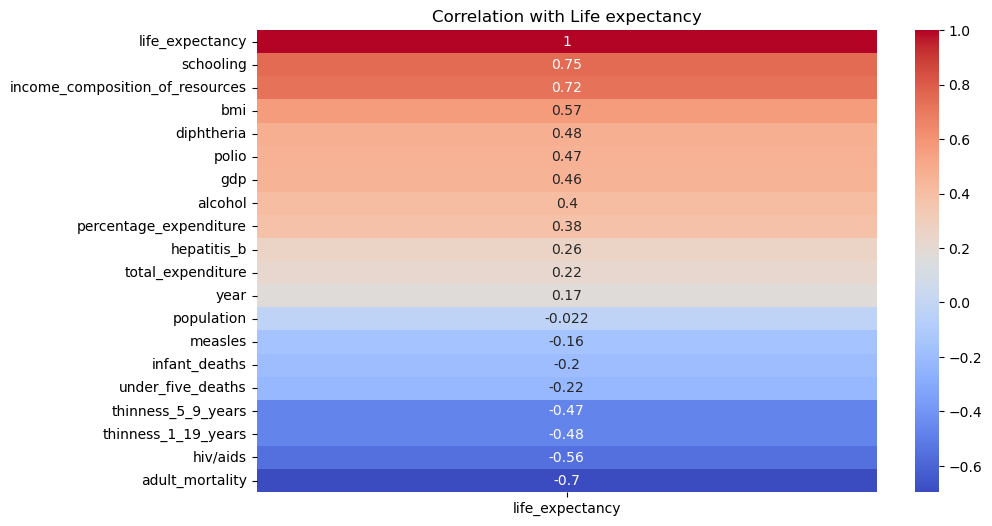

In [14]:
correlation = numeric_columns.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation[['life_expectancy']].sort_values(by='life_expectancy', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Life expectancy')
plt.show()

<Axes: >

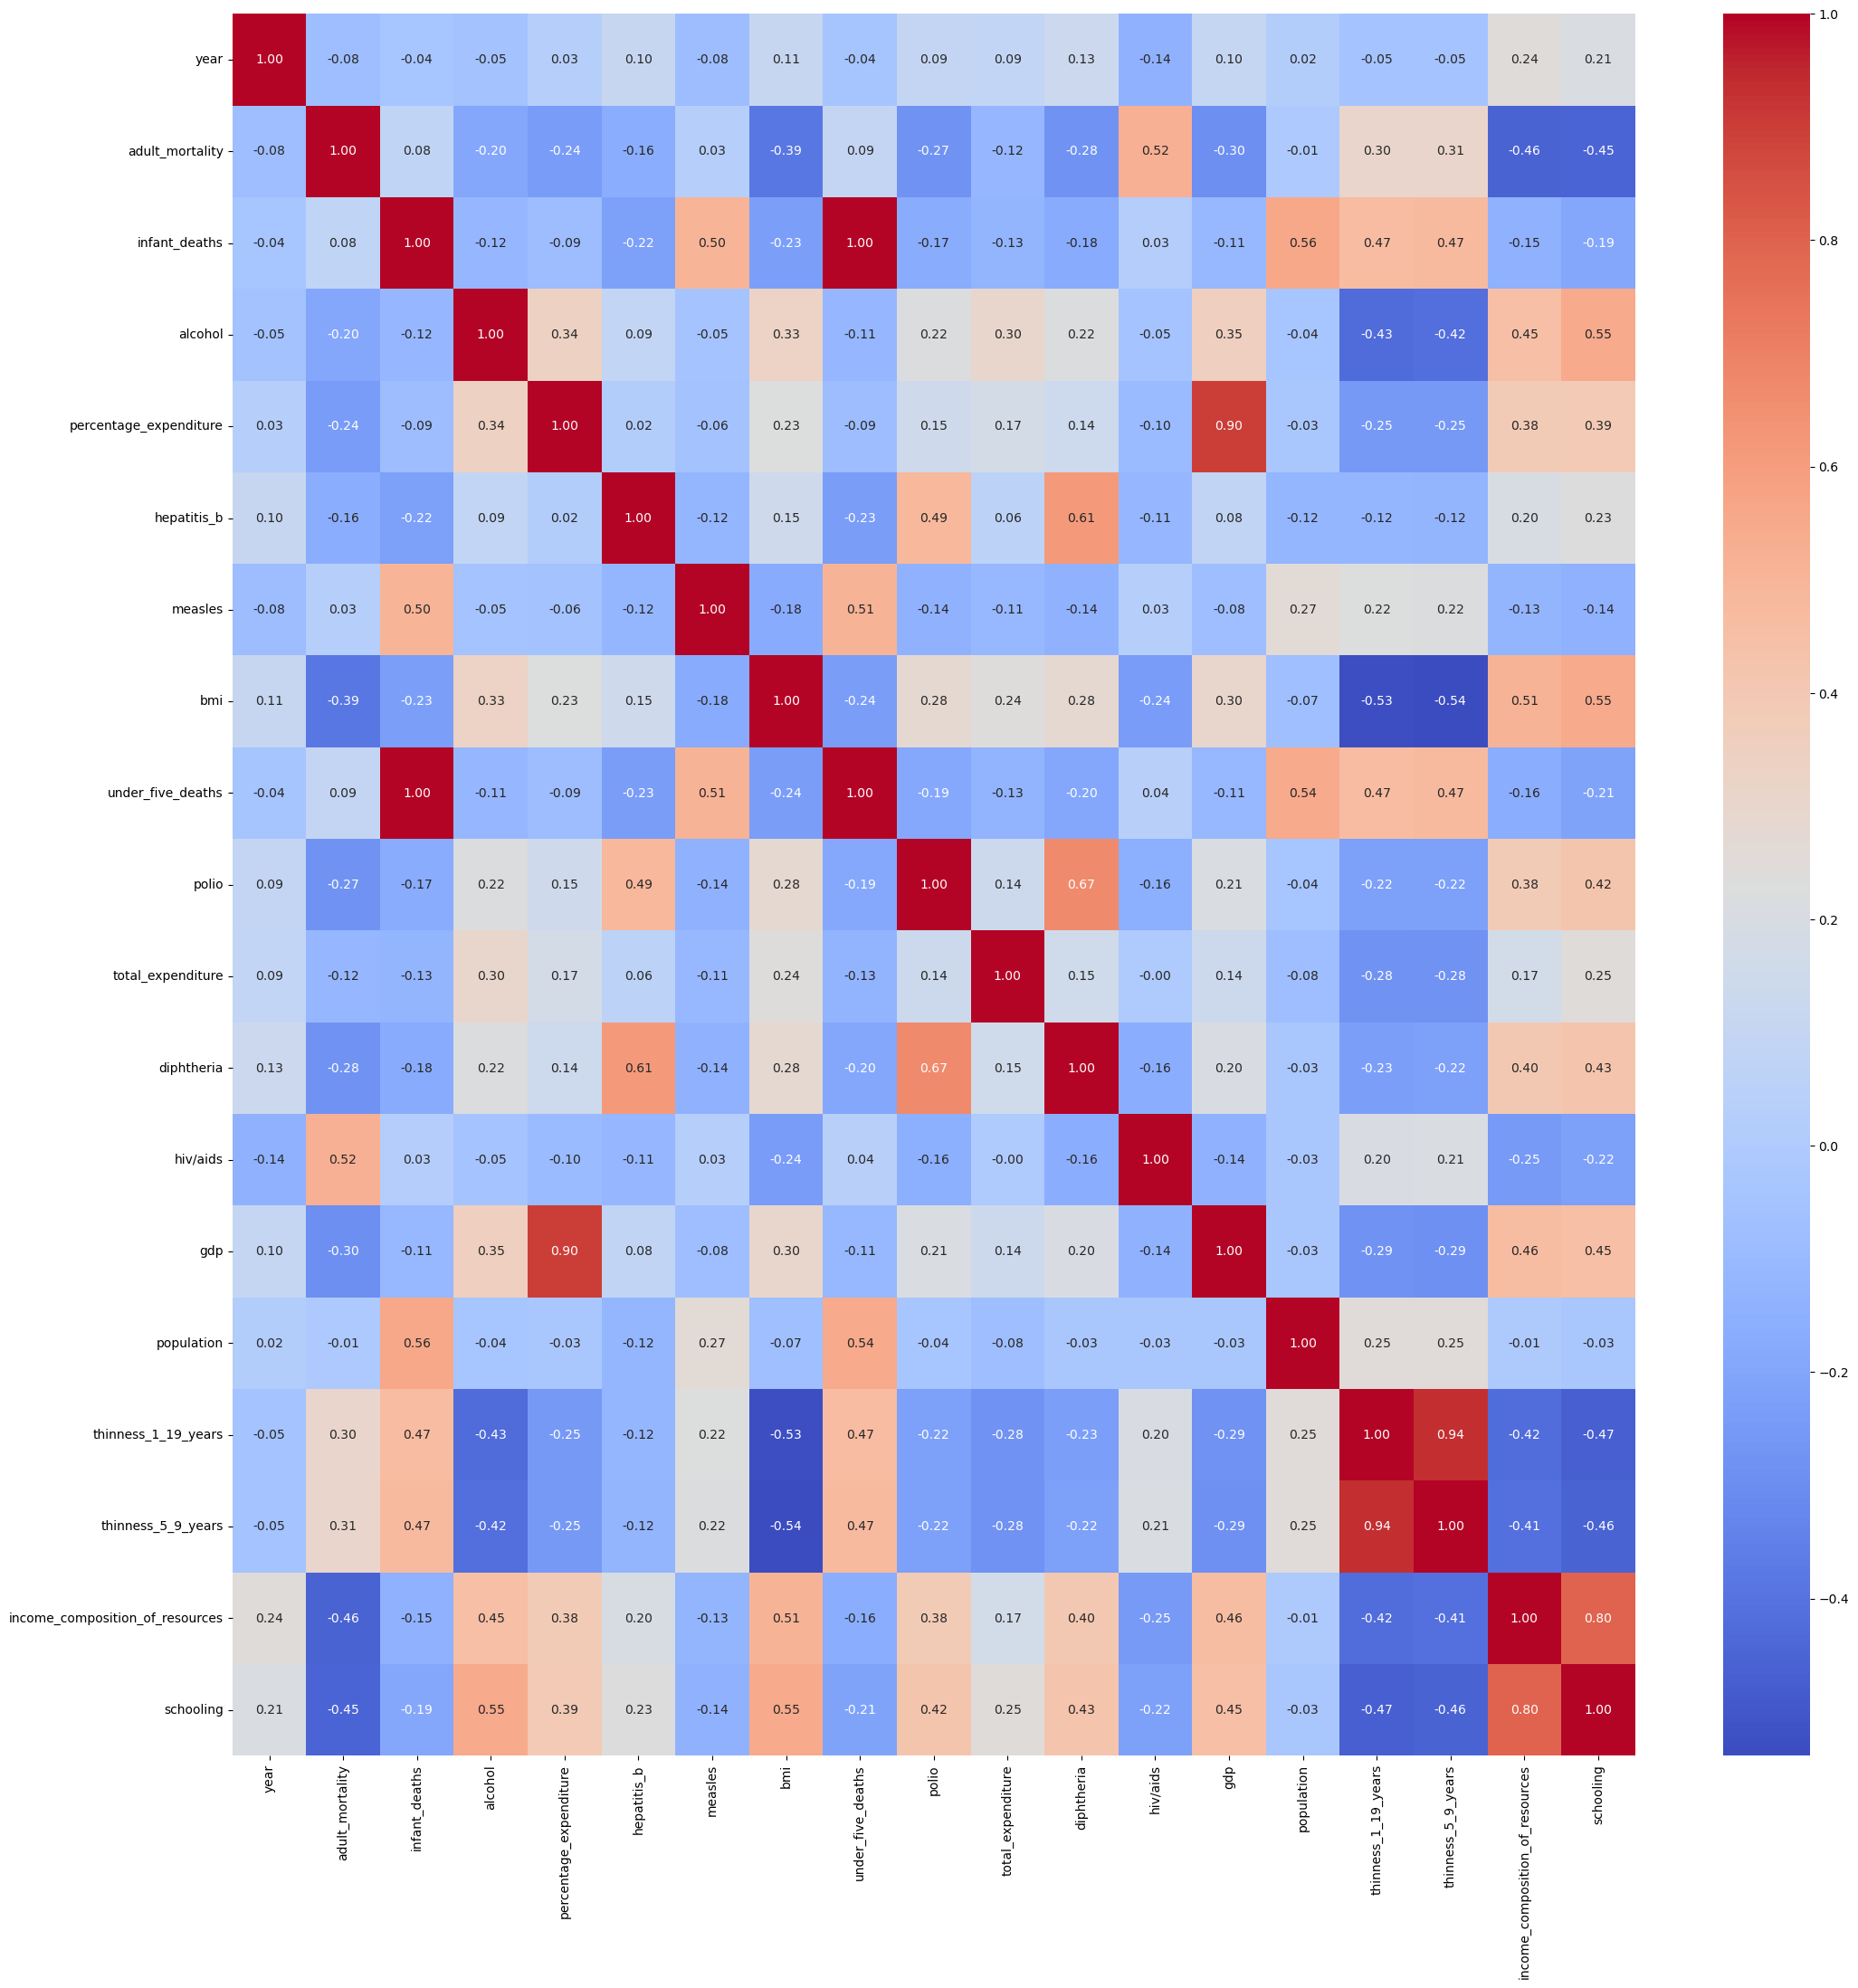

In [15]:
df_correlation = df.copy()
df_correlation = df_correlation.drop(['life_expectancy'], axis = 1)

corr = df_correlation.corr(numeric_only=True)
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

### Target variable
Our target value in this dataset is - 'life_expectancy'

In [16]:
df['life_expectancy'].value_counts()

life_expectancy
73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: count, Length: 362, dtype: int64

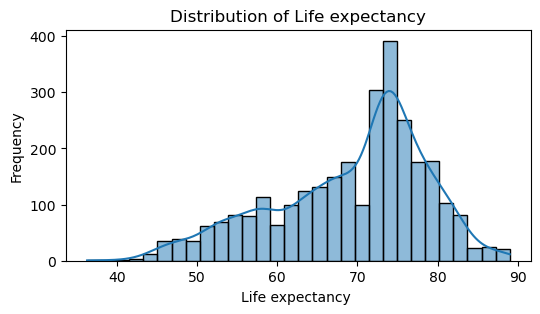

In [17]:
plt.figure(figsize=(6, 3))
sns.histplot(df['life_expectancy'], kde=True, bins=30)
plt.title('Distribution of Life expectancy')
plt.xlabel('Life expectancy ')
plt.ylabel('Frequency')
plt.show()

In [18]:
df['life_expectancy'].isnull().sum()

10

In [19]:
# remove rows with missing target values
df_cleaned = df.dropna(subset=['life_expectancy'])
df = df_cleaned

### Data split into train and validation sets
- There are some countries with only one row, so we will add them to the train set first and then split the data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
countries_with_one_row = df['country'].value_counts()[df['country'].value_counts() == 1].index
df_one_row_countries = df[df['country'].isin(countries_with_one_row)]

df_remaining = df[~df['country'].isin(countries_with_one_row)]

X_remaining = df_remaining.drop(columns=['life_expectancy'])
y_remaining = df_remaining['life_expectancy']

X_train_remaining, X_temporary, y_train_remaining, y_temporary = train_test_split(X_remaining, y_remaining, test_size=0.3, random_state=42)

X_validation, X_test, y_validation, y_test = train_test_split(X_temporary, y_temporary, test_size=0.50, random_state=42)

X_train = pd.concat([X_train_remaining, df_one_row_countries.drop(columns=['life_expectancy'])])
y_train = pd.concat([y_train_remaining, df_one_row_countries['life_expectancy']])

In [22]:
X_train

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
1911,Norway,2014,Developed,61.0,0,6.06,177.638288,NaN,3,6.8,...,93.0,9.72,93.0,0.1,975.498560,5137232.0,0.8,0.7,0.945,17.7
954,Gabon,2007,Developing,291.0,2,9.02,545.438957,75.0,0,31.9,...,78.0,2.86,81.0,10.0,8352.817110,1489193.0,6.9,6.8,0.645,12.4
1049,Grenada,2008,Developing,162.0,0,8.92,754.959713,99.0,0,42.4,...,99.0,5.76,99.0,0.1,7946.944346,NaN,3.8,3.9,0.000,15.4
1714,Micronesia (Federated States of),2000,Developing,185.0,0,2.23,0.000000,87.0,0,61.5,...,85.0,7.88,85.0,0.1,NaN,NaN,0.3,0.3,0.000,0.0
2021,Peru,2001,Developing,142.0,17,4.22,302.535906,NaN,0,46.1,...,9.0,4.98,9.0,0.5,1981.243653,26261363.0,1.4,1.4,0.677,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,Malta,2009,Developed,63.0,0,7.38,335.518057,86.0,1,67.1,...,73.0,8.33,73.0,0.1,2675.582590,412477.0,0.8,0.7,0.815,14.4
1097,Guinea-Bissau,2008,Developing,297.0,5,2.64,28.301911,NaN,12,21.9,...,77.0,6.50,77.0,6.0,583.544562,148841.0,8.5,8.4,0.398,8.8
1132,Haiti,2005,Developing,29.0,17,5.57,38.109043,NaN,0,38.5,...,6.0,4.41,6.0,3.9,465.311876,926344.0,4.4,4.4,0.452,8.2
1296,Italy,2001,Developed,75.0,2,9.69,3.122230,95.0,0,55.7,...,96.0,8.11,93.0,0.1,24.819000,569741.0,0.5,0.5,0.828,14.9


In [23]:
X_validation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 439 entries, 2225 to 1739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          439 non-null    object 
 1   year                             439 non-null    int64  
 2   status                           439 non-null    object 
 3   adult_mortality                  439 non-null    float64
 4   infant_deaths                    439 non-null    int64  
 5   alcohol                          406 non-null    float64
 6   percentage_expenditure           439 non-null    float64
 7   hepatitis_b                      348 non-null    float64
 8   measles                          439 non-null    int64  
 9   bmi                              435 non-null    float64
 10  under_five_deaths                439 non-null    int64  
 11  polio                            433 non-null    float64
 12  total_expenditure      

# Data preprocessing
- The Thinness 1-19 and Thinness 5-9 have the same distribution so we will choose one of them
- Under_5 death and infant_death are practically the same column so we drop infant_death (it has 100% correlation)
- Fill in numeric missing values with medians by year from X_train set
- Use label Encoder for categorical features

In [24]:
X_train.drop(columns=['thinness_5_9_years','infant_deaths'],inplace=True)
X_validation.drop(columns=['thinness_5_9_years','infant_deaths'],inplace=True)
X_test.drop(columns=['thinness_5_9_years','infant_deaths'],inplace=True)

### Categorical columns preprocessing

In [25]:
country_encoder = LabelEncoder()
status_encoder = LabelEncoder()

# 'country'
X_train['country'] = country_encoder.fit_transform(X_train['country'])
X_validation['country'] = country_encoder.transform(X_validation['country'])
X_test['country'] = country_encoder.transform(X_test['country'])

# 'status'
X_train['status'] = status_encoder.fit_transform(X_train['status'])
X_validation['status'] = status_encoder.transform(X_validation['status'])
X_test['status'] = status_encoder.transform(X_test['status'])

print(X_train[['country', 'status']].head())

      country  status
1911      119       0
954        59       1
1049       65       1
1714      106       1
2021      125       1


### Numeric columns preprocessing

In [26]:
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
group_median_by_year = X_train.groupby('year')[numeric_columns].transform('median')

X_train[numeric_columns] = X_train[numeric_columns].fillna(group_median_by_year)
X_validation[numeric_columns] = X_validation[numeric_columns].fillna(X_validation.groupby('year')[numeric_columns].transform('median'))
X_test[numeric_columns] = X_test[numeric_columns].fillna(X_test.groupby('year')[numeric_columns].transform('median'))

In [27]:
# if there are still missing values in validation and test sets, we fill them with median by the whole column
global_median = X_train[numeric_columns].median()

X_validation[numeric_columns] = X_validation[numeric_columns].fillna(global_median)
X_test[numeric_columns] = X_test[numeric_columns].fillna(global_median)

In [28]:
X_train.isnull().sum()

country                            0
year                               0
status                             0
adult_mortality                    0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1_19_years                0
income_composition_of_resources    0
schooling                          0
dtype: int64

In [29]:
X_test.isnull().sum()

country                            0
year                               0
status                             0
adult_mortality                    0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1_19_years                0
income_composition_of_resources    0
schooling                          0
dtype: int64

### Target variable scaling

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_train_scaled = pd.Series(y_train_scaled.flatten(), index=y_train.index)

y_validation_scaled = scaler.transform(y_validation.values.reshape(-1, 1))
y_validation_scaled = pd.Series(y_validation_scaled.flatten(), index=y_validation.index)

y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))
y_test_scaled = pd.Series(y_test_scaled.flatten(), index=y_test.index)

# Models

In [31]:
# Evaluate the model
def evaluate_model(regressor, y_pred, X_train):
    mse = mean_squared_error(y_test_scaled, y_pred)
    r2 = r2_score(y_test_scaled, y_pred)
    print("RMSE:", np.sqrt(mse))
    print("Mean Squared Error (MSE):", mse)
    print("R² Score:", r2)

    # Calculate Train MSE
    y_train_pred = regressor.predict(X_train)
    train_mse = mean_squared_error(y_train_scaled, y_train_pred)

    # Print the results
    print("Train MSE:", train_mse)
    print("Test MSE:", mse)

    # Compare the ratio of Train and Test MSE
    print("Test/Train MSE Ratio:", mse / train_mse)

### Random Forest (sklearn)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42) 

# Train the model
rf_regressor.fit(X_train, y_train_scaled)

# Predict on the test set
y_pred_rf = rf_regressor.predict(X_test)

print('Random Forest Regression Results:')
evaluate_model(rf_regressor, y_pred_rf, X_train)

Random Forest Regression Results:
RMSE: 0.23082357332724854
Mean Squared Error (MSE): 0.05327952200355968
R² Score: 0.9493704930741096
Train MSE: 0.008099384708187891
Test MSE: 0.05327952200355968
Test/Train MSE Ratio: 6.578218460187222


In [41]:
# Time for training
start_time = time.time()
rf_regressor.fit(X_train, y_train_scaled)
train_time = time.time() - start_time

# Time for test prediction
start_time = time.time()
y_pred_rf = rf_regressor.predict(X_test)
predict_time = time.time() - start_time

print("RandomForestRegressor")
print("Time for training:",train_time)
print("Time for test prediction:", predict_time)

RandomForestRegressor
Time for training: 0.2795870304107666
Time for test prediction: 0.0054361820220947266


### Linear Regression (sklearn)

In [33]:
from sklearn.linear_model import LinearRegression

lr_regressor = LinearRegression()

# Train the model
lr_regressor.fit(X_train, y_train_scaled)

# Predict on the test set
y_pred_lr = lr_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test_scaled, y_pred_lr)
r2 = r2_score(y_test_scaled, y_pred_lr)

print('Linear Regression Results:')
evaluate_model(lr_regressor, y_pred_lr, X_train)

Linear Regression Results:
RMSE: 0.4544680318840401
Mean Squared Error (MSE): 0.2065411920045529
R² Score: 0.8037317468730758
Train MSE: 0.18775491876680167
Test MSE: 0.2065411920045529
Test/Train MSE Ratio: 1.100057422522626


In [42]:
# Time for training
start_time = time.time()
lr_regressor.fit(X_train, y_train_scaled)
train_time = time.time() - start_time

# Time for test prediction
start_time = time.time()
y_pred_lr = lr_regressor.predict(X_test)
predict_time = time.time() - start_time

print("Linear Regression")
print("Time for training:",train_time)
print("Time for test prediction:", predict_time)

Linear Regression
Time for training: 0.03275299072265625
Time for test prediction: 0.0017931461334228516


### XGBoost

In [34]:
#!pip3 install xgboost

In [35]:
import xgboost as xgb

# Initialize the XGBoost Regressor
model_xgb = xgb.XGBRegressor(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,       # Maximum depth of each tree
    random_state=42
)

# Train the model
model_xgb.fit(X_train, y_train_scaled)
y_pred_xgb = model_xgb.predict(X_test)

print('XGBoost Results:')
evaluate_model(model_xgb, y_pred_xgb, X_train)

XGBoost Results:
RMSE: 0.26019144068908157
Mean Squared Error (MSE): 0.06769958580785984
R² Score: 0.9356676539194562
Train MSE: 0.037204353617807676
Test MSE: 0.06769958580785984
Test/Train MSE Ratio: 1.8196683781506628


In [43]:
# Time for training
start_time = time.time()
model_xgb.fit(X_train, y_train_scaled)
train_time = time.time() - start_time

# Time for test prediction
start_time = time.time()
y_pred_xgb = model_xgb.predict(X_test)
predict_time = time.time() - start_time

print("XGBoost")
print("Time for training:",train_time)
print("Time for test prediction:", predict_time)

XGBoost
Time for training: 0.10399889945983887
Time for test prediction: 0.00963592529296875


### Decision Tree from scratch

In [36]:
import numpy as np
import pandas as pd
from collections import Counter


class Node:
    def __init__(self, feature_index = None, threshold = None, left = None, right = None, var_red = None, var_imp = None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        self.var_imp = var_imp



class DecisionTreeRegressor:
    def __init__(self, max_depth = 10, min_samples_split = 2, min_samples_leaf = 1, num_features = None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.num_features = num_features
        self.root = None


    def fit(self, X, y):
        self.num_features = X.shape[1] if not self.num_features else min(X.shape[1], self.num_features)
        self.root = self.build_tree(X, y)


    def build_tree(self, X, y, depth = 0) -> Node:
        num_samples, num_features = X.shape
        if(depth >= self.max_depth or len(np.unique(y)) == 1 or num_samples < self.min_samples_split):
            leaf_val = np.mean(y)
            return Node(var_red=leaf_val)
        feat_ids = np.random.choice(num_features, self.num_features, replace = False)
        best_feat, best_threshold = self.best_split(X,y, feat_ids)
        if best_feat is None or best_threshold is None:
            leaf_val = np.mean(y)
            return Node(var_red=leaf_val)
        left_ids, right_ids = self.split(X[:, best_feat], best_threshold)
        left_subtree = self.build_tree(X[left_ids, :], y[left_ids], depth + 1)
        right_subtree = self.build_tree(X[right_ids, :], y[right_ids], depth + 1)
        return Node(best_feat, best_threshold, left_subtree, right_subtree)



    def best_split(self, X, y, feat_ids) -> tuple:
        best_gain = -1
        split_idx, split_thes = None, None
        for feat_id in feat_ids:
            X_col = X[:, feat_id]
            thresholds = np.unique(X_col)
            for thr in thresholds:
                left_ids, right_ids = self.split(X_col, thr)
                if len(left_ids) == 0 or len(right_ids) == 0:
                    continue
                gain = self.variance_reduction(y,y[left_ids],y[right_ids])
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_id
                    split_thes = thr
        return split_idx, split_thes

    def variance_reduction(self, y, left_y, right_y) -> float:
        parent_var = np.var(y)
        n = len (y)
        n_l = len(left_y)
        n_r = len(right_y)
        return parent_var - (n_l / n) * np.var(left_y) - (n_r / n) * np.var(right_y)


    def split(self, X_col, threshold) -> tuple:
        left_idx = np.argwhere(X_col <= threshold).flatten()
        right_idx = np.argwhere(X_col > threshold).flatten()
        return left_idx, right_idx

    def predict(self, X) -> np.array:
        return np.array([self.traverse_tree(x, self.root) for x in X])

    def traverse_tree(self, x, node) -> float:
        if node.var_red is not None:
            return node.var_red
        else:
            if x[node.feature_index] <= node.threshold:
                return self.traverse_tree(x, node.left)
            else:
                return self.traverse_tree(x, node.right)

In [37]:
custom_regressor = DecisionTreeRegressor(max_depth=3, min_samples_split=2, min_samples_leaf=1, num_features=None)

# Train the model
custom_regressor.fit(X_train, y_train_scaled)

# Predict on the test set
y_pred_custom = custom_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test_scaled, y_pred_custom)
r2 = r2_score(y_test_scaled, y_pred_custom)

print('Decision Tree custom Regression Results:')
evaluate_model(custom_regressor, y_pred_custom, X_train)

InvalidIndexError: (slice(None, None, None), 8)

### Random Forest from scratch

In [38]:
class RandomForestRegressor:
    def __init__(self, num_trees = 5, max_depth = 10, min_samples_split = 2, min_samples_leaf = 1, num_features = None):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.num_features = num_features
        self.min_samples_leaf = min_samples_leaf
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        if isinstance(X, pd.DataFrame):
            X = X.values
        else:
            X = np.array(X)  # Ensures X is a NumPy array
        if isinstance(y, pd.Series):
            y = y.values
        else:
            y = np.array(y)  # Ensures y is a NumPy array
        for i in range(self.num_trees):
            tree = DecisionTreeRegressor(max_depth = self.max_depth, min_samples_split = self.min_samples_split,
                                         min_samples_leaf = self.min_samples_leaf, num_features = self.num_features)
            X_sample, y_sample = self.bootstrap(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
            
    def bootstrap(self, X, y):
        num_sampls = X.shape[0]
        idxs = np.random.choice(num_sampls, num_sampls, replace = True)
        return X[idxs], y[idxs]


    def predict(self, X):
        if isinstance (X, pd.DataFrame):
            X = X.values
        else:
            X = np.array (X)  # Ensures X is a NumPy array
        predictions = np.array([tree.predict (X) for tree in self.trees])
        tree_preds = np.mean(predictions, axis=0)
        return tree_preds

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def train():
    data = datasets.load_diabetes()
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate custom RandomForest
    custom_clf = RandomForestRegressor(num_trees=10, max_depth=10)
    custom_clf.fit(X_train, y_train)
    custom_pred = custom_clf.predict(X_test)
    custom_mse_value = mse(y_test, custom_pred)
    print("Custom RandomForest MSE:", custom_mse_value)

    # Train and evaluate sklearn RandomForest
    sklearn_clf = SklearnRandomForestRegressor(n_estimators=10, max_depth=10, random_state=42)
    sklearn_clf.fit(X_train, y_train)
    sklearn_pred = sklearn_clf.predict(X_test)
    sklearn_mse_value = mean_squared_error(y_test, sklearn_pred)
    print("Sklearn RandomForest MSE:", sklearn_mse_value)

def main():
    train()

if __name__ == "__main__":
    main()

Custom RandomForest MSE: 3138.228964786663
Sklearn RandomForest MSE: 3074.7925811290265
